<h1 style="font-size:3rem;color:orange;">Compressional Waves in Liquids and Solids (1D)</h1>

<h2 style="font-size:2rem;color:black;">Problem Statement:</h2>




### Given a cylinder of length $L$ filled with fluid of density $\rho$ and elastic modulus $E$, and cross-sectional area $A$, compute wavelet dynamics.

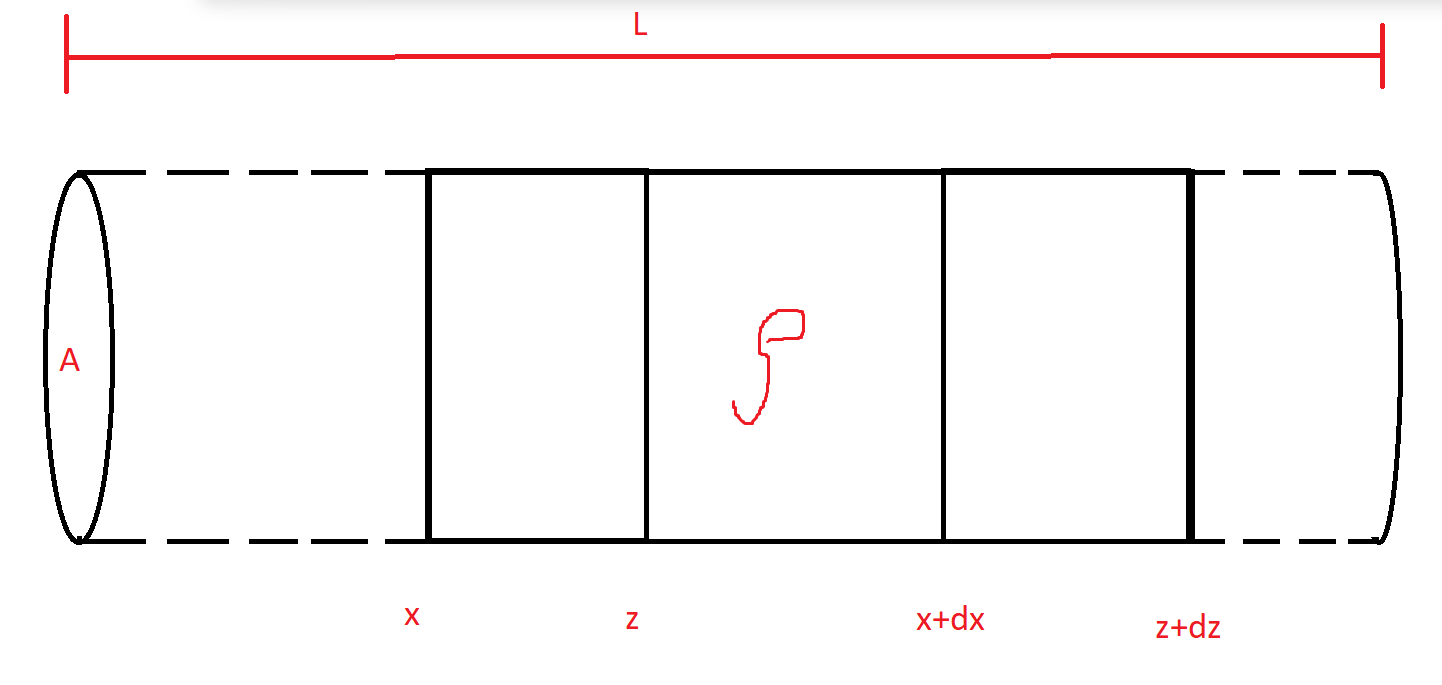

Starting with newtons second law, we construct the equation of motion:

## $\vec{F}=m\vec{a}$

To relate the above equation to the physics of the system, we have to find relationships for mass and force. The mass of the infinitesimal fluid length is:

## $m=\rho V$

Where the volume segment $V$ is:

## $V=A\Delta x$

Thus:

## $m = \rho A\Delta x$

The equation of state for a solid or liquid is the stress-strain equation. In particular, the relationship is linear for small strains with proportionality constant $E$, or Young's modulus.

## $\sigma=E\epsilon$

Stress $\sigma$ is defined as:

## $\sigma = \dfrac{F_2-F_1}{A}$

And strain $\epsilon$ is defined as:

## $\epsilon = \dfrac{\Delta z}{\Delta x}$

Combining the above:

## $\dfrac{F_2-F_1}{A}=E\dfrac{\Delta z}{\Delta x}$

Rearranging:

## $F = F_2-F_1=EA\dfrac{\Delta z}{\Delta x}$

Subbing into the equation of motion:

## $EA\dfrac{\Delta z}{\Delta x} =  \rho A\Delta x\dfrac{d^2z}{dt^2}$

Simplifying.

## $\dfrac{\Delta z}{\Delta x} =  \dfrac{\rho}{E} \Delta x\dfrac{d^2z}{dt^2}$

## $ \dfrac{d^2z}{dt^2} = \dfrac{E}{\rho}\dfrac{1}{\Delta x}\dfrac{\Delta z}{\Delta x}$

The strain term can be thought of as the change in z over change in x evaluated at $x+\Delta x$

## $\Delta z=\dfrac{\partial z}{\partial x}\Delta x$

As the limit of $\Delta x$ approaches zero:

## $ \dfrac{d^2z}{dt^2} = \dfrac{E}{\rho}\dfrac{1}{dx}\dfrac{d}{dx}\dfrac{dz}{dx}dx$

## $\dfrac{d^2z(x,t)}{dt^2} = \dfrac{E}{\rho}\dfrac{d^2z(x,t)}{dx^2}$

The above is the longitudinal wave equation for a thin fluid or solid rod.

The wave velocity is given by:

## $v = \sqrt{\dfrac{E}{\rho}}$

The modulus of elasticity E of water is 2.25e9, the speed of sound v is 1500m/s & the density of water is 1000kg/m^3.

Given the above partial differential equation, we can convert it to discrete form and solve for the next timestep for each position in the rod with the addition of a forcing term f(x,t).

$ \dfrac{z[x,t+1]-2z[x,t]+z[x,t-1]}{(\Delta t)^2} - \dfrac{E}{\rho}\dfrac{z[x+1,t]-2z[x,t]+z[x-1,t]}{(\Delta x)^2} - \dfrac{1}{\rho}f(x,t)=0$

Solving for z(x,t+1):

In [77]:
import numpy as np
import time
import matplotlib.pylab as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from sympy import *
import sympy as smp
smp.init_printing()

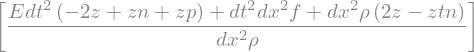

In [78]:
zp, z, zn, dt, dx, E, rho, f, ztp, ztn = smp.symbols('zp z zn dt dx E rho f ztp ztn')
k1 = (ztp-(2*z)+ztn)/(dt**2)
k2 = (E/rho)*(zp-(2*z)+zn)/(dx**2)
k3 = 0#Insert term for damping
k4 = 1*(1/rho)*f
eqn = smp.Eq(0,k1 - k2 + k3 - k4)
#eqn = smp.Eq(0,k2-k1)
#eqn = smp.Eq(0,k1 - k2)
(solve(eqn,ztp))  

Define material properties, geometries, and constants.

In [79]:
#Geometry
L = 0.030#[m]

#Materials
rho = 1000.0 #[kg/m^3]
E = 2.25e9#[insert units]
b = 0.0#Viscous damping

Define spatial and temporal resolutions and memory buffers.

In [80]:
c = (E/rho)**0.5

#Desired Time range
t0 = 0.0#[s]
tf = 0.1e-3#[s]

#Boundary Conditions
x0 = 0.0#[m]
xf = L#[m]

dx = 15e-6
dt = 10e-9


print('Wave Velocity: ', str(c), ' m/s')
print('Stability Constant: ', str(c*dt/dx))

n_x = int((xf-x0)/dx)
n_t = int((tf-t0)/dt)

print('n_x', str(n_x))
print('n_t', str(n_t))
print('Total Calculations', str(n_x*n_t))

x = np.linspace(0.0,L,n_x)
t = np.linspace(0,tf,n_t)
z = np.zeros((n_x,n_t))
n = np.linspace(0,n_x,n_x)
tt = np.linspace(0,tf,n_t)
print(tt)

Wave Velocity:  1500.0  m/s
Stability Constant:  1.0
n_x 1999
n_t 10000
Total Calculations 19990000
[0.00000000e+00 1.00010001e-08 2.00020002e-08 ... 9.99799980e-05
 9.99899990e-05 1.00000000e-04]


Define initial and boundary conditions:

100


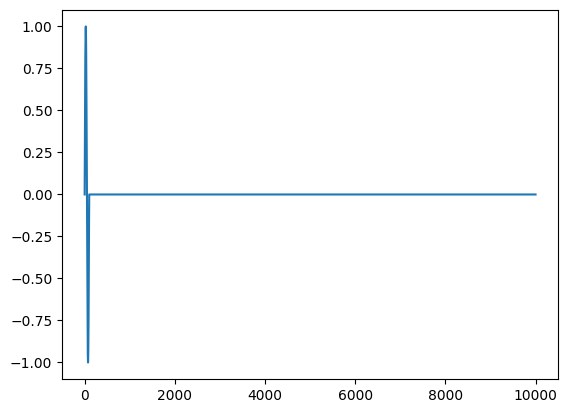

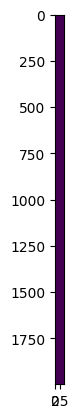

In [81]:
#Boundary Conditions
z[0:5,:] = 0
z[n_x-2:n_x,:] = 0

#Initial Conditions
flag_initial = 3

if flag_initial == 0:
    #Zero state
    z[:,:] = 0
elif flag_initial == 1:
    #Half-sine stretched string
    z[:,0]=(-np.cos((2*3.145926/n_x)*n)+1)/2
    z[:,1]=(-np.cos((2*3.145926/n_x)*n)+1)/2
    z[:,2]=(-np.cos((2*3.145926/n_x)*n)+1)/2
elif flag_initial == 2:
    #sine disturbance
    freq_disturbance = 100e3
    z[0,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))
    z[1,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))
    z[2,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))
elif flag_initial == 3:
    #sine disturbance
    freq_disturbance = 1e6
    z[0,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))
    z[1,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))
    z[2,:]=(np.sin((2*3.141592654*freq_disturbance*tt)))    
    z[0,int((1/freq_disturbance)/dt):] = 0
    z[1,int((1/freq_disturbance)/dt):] = 0
    z[2,int((1/freq_disturbance)/dt):] = 0
    print(int((1/freq_disturbance)/dt))
    

#Show initial and boundary conditions
plt.plot(z[1,:])
plt.show()
plt.imshow(z[:,0:50])

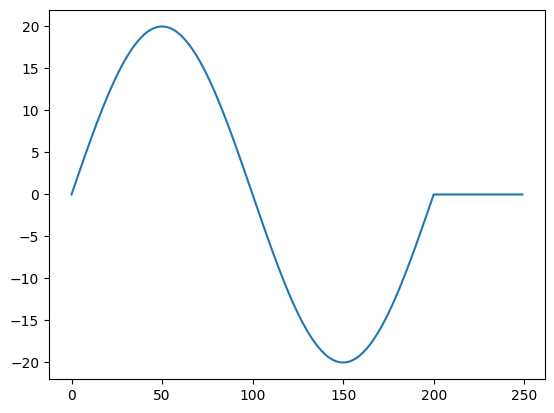

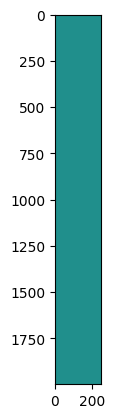

In [82]:
#Stimulus
f = np.zeros((n_x,n_t))

flag_forcing = 2
#No forcing
if flag_forcing == 0:
    f = np.zeros((n_x,n_t))
#Constant forcing
elif flag_forcing == 1:
    f[3,:] = np.sin(2*3.1415926*5000*t)
#Single period sine burst
elif flag_forcing == 2:
    f_lambda = L/10
    f_freq = c/f_lambda
    f_T = 1/f_freq
    f_n = int(f_T/dt)
    f_amplitude = 20
    f[3,0:f_n] = f_amplitude*np.sin(2*3.1415926*f_freq*t[0:f_n])

plt.plot(f[3,:250])
plt.show()
plt.imshow(f[:,0:250])

Create function to compute next time step at given point.

In [83]:
def oned_fdtd(z,zp,zn,ztn):
    return ((E*dt**2*(-2*z + zn + zp) + (dx**2)*rho*(2*z - ztn)) / ((dx**2)*rho))

Initialize animation parameters:

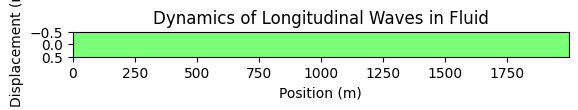

In [100]:
fps = 25
metadata = dict(title='Movie', artist='Nathaniel_Rohrick')
writer = PillowWriter(fps=fps,metadata=metadata)

fig = plt.figure()
#l, = plt.plot([], [], 'k--')#add me if needing 1d line plot
l = plt.imshow([z[:,0]], aspect=100, vmin=-1, vmax=1, cmap='jet')
#l = plt.pcolormesh
#plt.xlim(x0,xf)
#plt.ylim(-1.1,1.1)
plt.xlabel('Position (m)')
plt.ylabel('Displacement (m)')
plt.title('Dynamics of Longitudinal Waves in Fluid')
#l.set_data(x,z[:,0])#This works with plt.plot()
l.set_data([z[:,0]])

In [101]:
print('init')
with writer.saving(fig, 'pulse.gif', 100):
    for j in range(1,n_t-1):#Iterate in time
        for i in range(2,n_x-2):#Iterate in space
            #Free vibration equation no damping
            z[i,j+1] = oned_fdtd(z[i,j], z[i+1,j],z[i-1,j],z[i,j-1])
    print('simulation complete')
    k_simscale = 20
    k_simlength = 2.5
    print('gif frames', str(n_t/k_simlength/k_simscale))
    print('gif duration', str(n_t/k_simlength/k_simscale/fps))
    for j in range(int(n_t/k_simlength/k_simscale)):
        #l.set_data(x,z[:,int(j*k_simscale)])#This works with plt.plot()
        l.set_data([z[:,j*k_simscale]])
        writer.grab_frame()
    print('animation complete')
print('done')
plt.close()

init
simulation complete
gif frames 200.0
gif duration 8.0
animation complete
done


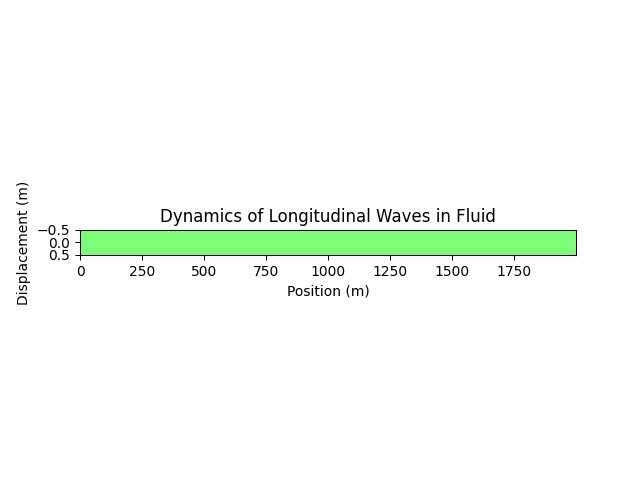